In [1]:
import sys
from os import getcwd
import os
from os.path import basename, dirname
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import torch
from scipy import stats
import random
import statsmodels
from statsmodels.tsa.seasonal import STL
from statsmodels.tools.eval_measures import rmse
import yfinance as yf
import argparse
import sys



/home/lirannoc/.conda/envs/da/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import darts
from darts.models import NBEATSModel,BlockRNNModel,RNNModel,ExponentialSmoothing, TCNModel, TransformerModel
from statsmodels.tsa.seasonal import STL
from darts.utils.data import TrainingDataset, PastCovariatesTrainingDataset
from darts.utils.data import PastCovariatesInferenceDataset
from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries
from darts.datasets import AirPassengersDataset, AusBeerDataset
from darts.dataprocessing.transformers.boxcox import BoxCox

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

import da_transformations as da
import da_forecasting
from da_datasets import UnivariateDataset, get_dataset



In [3]:
seed = np.random.randint(low = 0,high = 1000)
print(seed)


datasets = ['Sunspots']
data, seasonality = get_dataset(datasets[0]) 

models = ['RNN','N-BEATS-G','N-BEATS-I','TRANSFORMER','TCN']
#models = ['TCN']
split = 0.7
reps = 1
inlen = 12
outlen = 6

568


In [4]:
len(data)

2820

## Baseline

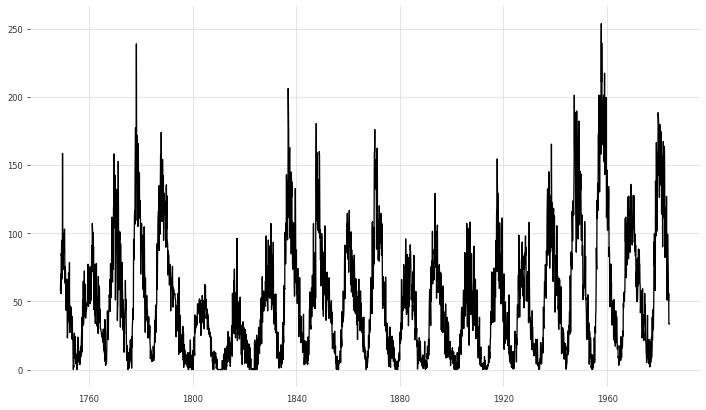

In [5]:
plt.figure(figsize=(12, 7))
plt.plot(data)
plt.show()

2022-07-27 16:09:47 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 16:09:47 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 16:09:47 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 16:09:47 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 16:09:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 16:09:49 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 16:09:49 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 30.5 K


Epoch 199: 100%|██████████| 62/62 [00:00<00:00, 135.24it/s, loss=0.00519, train_loss=0.00451]


2022-07-27 16:11:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:11:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:11:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


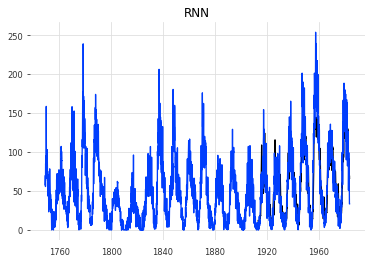

2022-07-27 16:11:39 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 16:11:39 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 16:11:39 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 16:11:39 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 16:11:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 16:11:39 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 16:11:39 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.0 M 


Epoch 199: 100%|██████████| 62/62 [00:01<00:00, 37.87it/s, loss=0.000174, train_loss=6.1e-5]  


2022-07-27 16:17:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:17:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:17:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:18:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:18:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


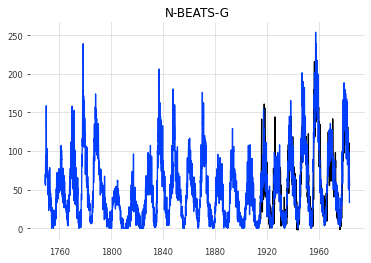

2022-07-27 16:18:48 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 16:18:48 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 16:18:48 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 16:18:48 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 16:18:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 16:18:48 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 16:18:48 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 1.6 M 


Epoch 199: 100%|██████████| 62/62 [00:00<00:00, 85.32it/s, loss=0.000545, train_loss=0.000789]


2022-07-27 16:21:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:21:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:21:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


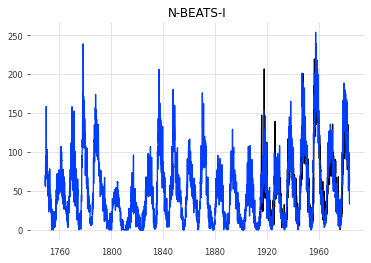

2022-07-27 16:21:51 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 16:21:51 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 16:21:51 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 16:21:51 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 16:21:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 16:21:51 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 16:21:51 pytorch_lightning.callbacks.model_summary INFO: 
  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3

Epoch 199: 100%|██████████| 62/62 [00:01<00:00, 60.86it/s, loss=0.00245, train_loss=0.00224] 


2022-07-27 16:25:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:25:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:25:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


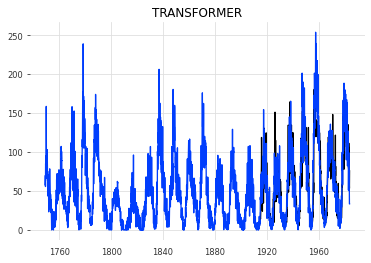

2022-07-27 16:25:43 darts.models.forecasting.tcn_model INFO: Number of layers chosen: 2
2022-07-27 16:25:43 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 16:25:43 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 16:25:43 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 16:25:43 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 16:25:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 16:25:43 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 16:25:43 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     


Epoch 199: 100%|██████████| 62/62 [00:00<00:00, 143.73it/s, loss=0.00763, train_loss=0.00952]


2022-07-27 16:26:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:26:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:26:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:26:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:26:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:26:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:26:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:26:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:26:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:26:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:26:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:26:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:26:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:26:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:26:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:26:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:26:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:26:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:26:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:26:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]

2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


2022-07-27 16:27:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 62it [00:00, ?it/s]


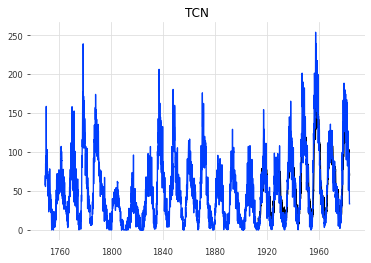

,Dataset,Model,avg MAPE,avg RMSE,avg sMAPE,std MAPE,std RMSE,std sMAPE,n ops,mag,op prob
0,Sunspots,RNN,6444526493022380.0,26.021,40.629,0.0,0.0,0.0,0,[],[]
0,Sunspots,N-BEATS-G,5028338259557805.0,27.605,43.745,0.0,0.0,0.0,0,[],[]
0,Sunspots,N-BEATS-I,4519374235849730.0,28.62,43.307,0.0,0.0,0.0,0,[],[]
0,Sunspots,TRANSFORMER,4782601705075146.0,29.053,42.943,0.0,0.0,0.0,0,[],[]
0,Sunspots,TCN,7836172221904122.0,26.46,43.077,0.0,0.0,0.0,0,[],[]


In [6]:

aug_n = 0 # number of operations
aug_m = [] # magnitude per operation
aug_p = [] # probability density function for the transformations
baseline_result  = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,
            seed = seed)      
baseline_result


# Identity

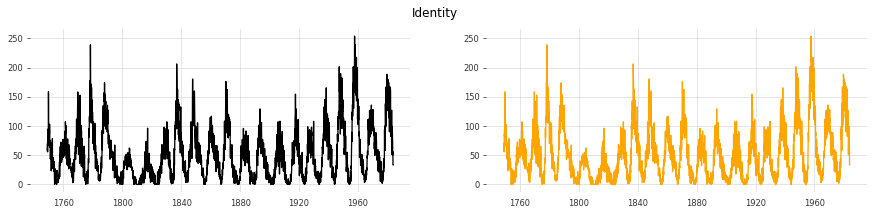

In [7]:
da.plot_augmentation(data,seasonality,"Identity")

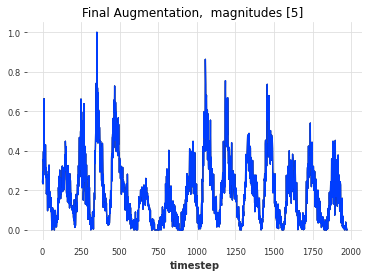

2022-07-27 16:27:22 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 16:27:22 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 16:27:22 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 16:27:22 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 16:27:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 16:27:22 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 16:27:22 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 30.5 K


Epoch 199: 100%|██████████| 123/123 [00:00<00:00, 134.07it/s, loss=0.00369, train_loss=0.00239]


2022-07-27 16:30:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:30:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


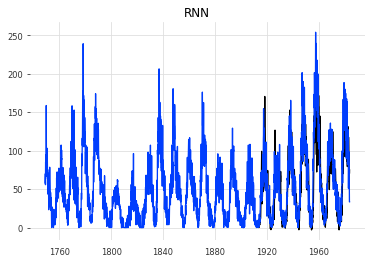

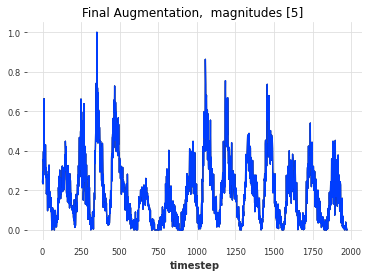

2022-07-27 16:30:41 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 16:30:41 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 16:30:41 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 16:30:41 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 16:30:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 16:30:41 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 16:30:41 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.0 M 


Epoch 199: 100%|██████████| 123/123 [00:03<00:00, 38.59it/s, loss=4.19e-05, train_loss=2.78e-5] 


2022-07-27 16:41:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:50 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:51 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:52 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:53 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:54 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:55 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:56 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:42:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:42:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:43:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:43:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:43:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:43:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:43:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:43:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:43:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:43:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:43:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:43:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:43:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:43:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:43:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


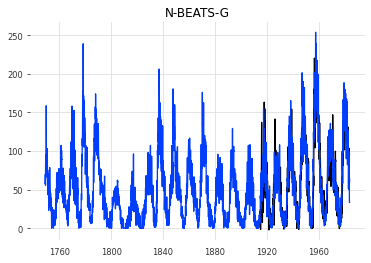

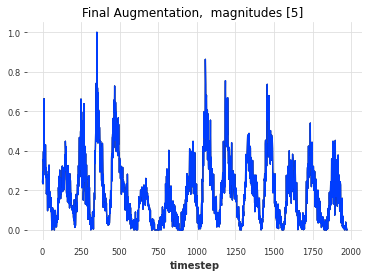

2022-07-27 16:43:09 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 16:43:09 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 16:43:09 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 16:43:09 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 16:43:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 16:43:09 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 16:43:09 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 1.6 M 


Epoch 199: 100%|██████████| 123/123 [00:01<00:00, 84.11it/s, loss=0.000466, train_loss=0.000287]


2022-07-27 16:47:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:57 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:47:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:02 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:48:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:48:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


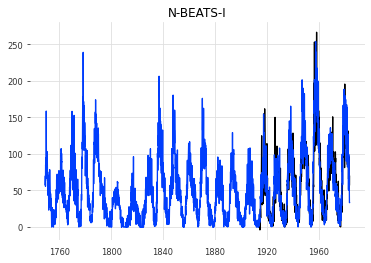

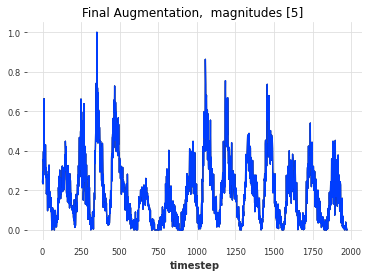

2022-07-27 16:48:33 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 16:48:33 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 16:48:33 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 16:48:33 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 16:48:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 16:48:33 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 16:48:33 pytorch_lightning.callbacks.model_summary INFO: 
  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3

Epoch 199: 100%|██████████| 123/123 [00:02<00:00, 61.19it/s, loss=0.000998, train_loss=0.00084] 


2022-07-27 16:55:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:15 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:16 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:17 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:18 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:19 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:20 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:24 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:25 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:27 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:28 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:38 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:39 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:40 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]

2022-07-27 16:55:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 123it [00:00, ?it/s]


2022-07-27 16:55:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 123it [00:00, ?it/s]


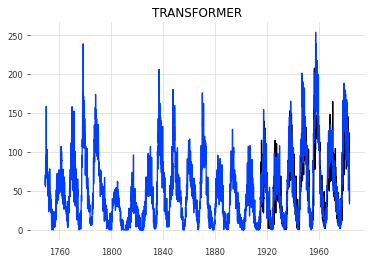

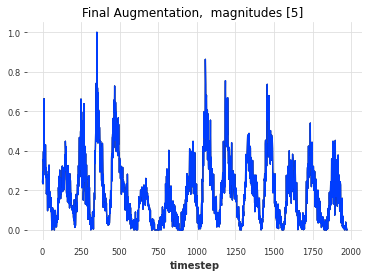

2022-07-27 16:55:46 darts.models.forecasting.tcn_model INFO: Number of layers chosen: 2
2022-07-27 16:55:46 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-27 16:55:46 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-27 16:55:46 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-27 16:55:46 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-27 16:55:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-27 16:55:46 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-27 16:55:46 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     


Epoch 135:  58%|█████▊    | 71/123 [00:00<00:00, 152.02it/s, loss=0.00747, train_loss=0.00754] 

In [ ]:

aug_n = 1
aug_m = [5]
aug_p = [(np.array(list(da.ranges.keys()))=='Identity').astype(int)]
iden_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,
            seed=seed)
iden_results

# Jittering

In [ ]:
da.plot_augmentation(data[:500],seasonality,"Jittering")

In [ ]:

aug_n = 1
aug_m = [3]
aug_p = [(np.array(list(da.ranges.keys()))=='Jittering').astype(int)]
jitter_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,
            seed = seed) 
jitter_results

# Flip

In [ ]:
da.plot_augmentation(data[:500],seasonality,"Flip")

In [ ]:
aug_n = 1
aug_m = [5]
aug_p = [(np.array(list(da.ranges.keys()))=='Flip').astype(int)]
flip_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,
            seed=seed)
flip_results

# Trend Scale

In [ ]:
da.plot_augmentation(data[:500],seasonality,"Trend Scale")

In [ ]:
aug_n = 1
aug_m = [7]
aug_p = [(np.array(list(da.ranges.keys()))=='Trend Scale').astype(int)]
trend_scale_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,seed = seed)
trend_scale_results

# Permutation

In [ ]:
da.plot_augmentation(data[:500],seasonality,"Permutation")

In [ ]:
aug_n = 1
aug_m = [6]
aug_p = [(np.array(list(da.ranges.keys()))=='Permutation').astype(int)]
perm_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
perm_results


# Scale

In [ ]:
da.plot_augmentation(data[:500],seasonality,"Scale")

In [ ]:
aug_n = 1
aug_m = [7]
aug_p = [(np.array(list(da.ranges.keys()))=='Scale').astype(int)]
scale_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
scale_results

# Reverse

In [ ]:
da.plot_augmentation(data[:500],seasonality,"Reverse")

In [ ]:
aug_n = 1
aug_m = [7]
aug_p = [(np.array(list(da.ranges.keys()))=='Reverse').astype(int)]
reverse_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,seed = seed)
reverse_results

# Smoothing - Temporal Smoothness (Least Squares)

In [ ]:
da.plot_augmentation(data[:500],seasonality,"Smooth LS")

In [ ]:
aug_n = 1
aug_m = [4]
aug_p = [(np.array(list(da.ranges.keys()))=='Smooth LS').astype(int)]
ls_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
ls_results

# Smoothing ETS

In [ ]:
da.plot_augmentation(data[:500],seasonality,"Smooth ETS")

In [ ]:
aug_n = 1
aug_m = [4]
aug_p = [(np.array(list(da.ranges.keys()))=='Smooth ETS').astype(int)]
ets_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
ets_results

# MBB

In [ ]:
da.plot_augmentation(data[:500],seasonality,"MBB")

In [ ]:
aug_n = 1
aug_m = [7]
aug_p = [(np.array(list(da.ranges.keys()))=='MBB').astype(int)]
mbb_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,seed = seed)
mbb_results

# Gaussian time warping

In [ ]:

da.plot_augmentation(data[:500],seasonality,"Gaussian TW")

In [ ]:
aug_n = 1
aug_m = [2]
aug_p = [(np.array(list(da.ranges.keys()))=='Gaussian TW').astype(int)]
gtw_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
gtw_results

# Dynamic Time Stretching

In [ ]:
da.plot_augmentation(data[:500],seasonality,"DTS")

In [ ]:
aug_n = 1
aug_m = [6]
aug_p = [(np.array(list(da.ranges.keys()))=='DTS').astype(int)]
dts_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
dts_results

# Window Warping

In [ ]:
da.plot_augmentation(data[:500],seasonality,"Window Warping")

In [ ]:
aug_n = 1
aug_m = [5]
aug_p = [(np.array(list(da.ranges.keys()))=='DTS').astype(int)]
ww_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True, seed = seed)
ww_results

# Save results

In [ ]:
results = []
results.append(dts_results)
results.append(gtw_results)
results.append(mbb_results)
results.append(ets_results)
results.append(ls_results)
results.append(reverse_results)
results.append(scale_results)
results.append(perm_results)
results.append(trend_scale_results)
results.append(flip_results)
results.append(jitter_results)
results.append(iden_results)
results.append(baseline_result)
results.append(ww_results)

aug_results = pd.concat(results)
aug_results['seed']  = seed

In [ ]:
aug_results.to_excel(datasets[0]+"/seed_"+str(seed)+"_aug_results1.xlsx")

In [ ]:
seed